In [30]:
import os
from os.path import join as ojoin

In [31]:
sim_dir = ojoin('..', 'simulation_results') 

directories = dict()
for approach in ('mip', 'fairim'):
    for attribute in ('age', 'gender', 'ethnicity'):
        directories[(approach, attribute)] = ojoin(sim_dir, approach, 'dc', attribute)

In [32]:
def extract_coverage(fpath):
    total_coverage = 0
    with open(fpath) as f:
        for line in f:
            line = line.strip()
            if not line: continue
            total_coverage += float(line)
    return total_coverage

def extract_coverage_list(dpath):
    coverages = []
    for i in range(20):
        fpath = ojoin(dpath, 'output_%d.txt'%i)
        coverage = extract_coverage(fpath)
        coverages.append(coverage)
    return coverages

In [33]:
coverage_lists = dict()
for key in directories.keys():
    coverage_lists[key] = extract_coverage_list(directories[key])

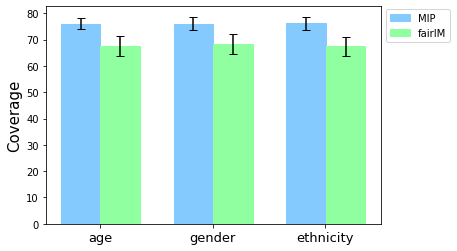

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


values = []
for attribute in ('age', 'gender', 'ethnicity'):
    for approach in ('mip', 'fairim'):
        values.append(coverage_lists[(approach, attribute)])

means = [np.mean(v) for v in values]
stds = [np.std(v) for v in values]
xpos = []
for i in range(3):
    xpos.append(i)
    xpos.append(i + 0.35)

bars = plt.bar(xpos, means, yerr=stds, align='center', capsize=4, width=0.35)
colors = ['#85caff', '#8fffa0'] * 3
for i in range(6):
    bars[i].set_color(colors[i])
    
labels = ('age', 'gender', 'ethnicity')
locs = [i + 0.17 for i in range(3)]
_ = plt.xticks(locs, labels, fontsize=13)

_ = plt.ylabel('Coverage', fontsize=15)
_ = plt.legend(bars[:2], ('MIP', 'fairIM'), bbox_to_anchor=(1, 1.01), loc=2)
_ = plt.savefig('images/DC.svg', bbox_inches='tight')